# Exploratory Data Analysis

#### Importing Dependencies

In [1]:
import pandas as pd
import folium
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#### Reading data from the csv file into pandas dataframe

In [2]:
df = pd.read_csv('europe_venues.csv', index_col=0)

#### Sample data

In [3]:
df.sample(10)

,City,City Latitude,City Longitude,Country,Venue,Venue Category,Venue Latitude,Venue Longitude
22134,Brasov,45.652309,25.610275,Romania,Tucano Coffee Peru,Coffee Shop,45.672040,25.615631
36183,Geneve,46.201756,6.146601,Switzerland,Le Rouge et le Blanc,Wine Bar,46.206388,6.145571
24096,Rivne,50.619617,26.251316,Ukraine,Алея ковальских скульптур,Park,50.617616,26.247701
1761,Novosibirsk,55.028217,82.923451,Russia,Extreme Fitness,Gym / Fitness Center,55.029694,82.934362
42883,Rzeszow,50.037453,22.004717,Poland,Biedronka,Supermarket,49.967519,22.028231
23335,Petrozavodsk,61.790039,34.390007,Russia,Coffee Shop,Coffee Shop,61.784105,34.345797
12594,Sevastopol,44.554729,33.472024,Ukraine,Мыс Фиолент,Mountain,44.505879,33.506205
5315,Amsterdam,52.374540,4.897975,Netherlands,Kaagman & Kortekaas,French Restaurant,52.374878,4.892455
39481,Baranovichi,53.132293,26.018416,Belarus,Чабарок,Gourmet Shop,53.121530,26.025190
21614,Taganrog,47.215366,38.928522,Russia,New York Coffee (Таймкофейня),Coffee Shop,47.212215,38.933684


### Higher level statistics

In [7]:
print("Total number of venues : {}".format(df.shape[0]))
print("Total number of cities : {}".format(len(df.groupby('City'))))
print("Total number of countries : {}".format(len(df.groupby('Country'))))

Total number of venues : 43658
Total number of cities : 499
Total number of countries : 36


In [11]:
print("Data despriction : ")
df.describe()

Data despriction : 


,City Latitude,City Longitude,Venue Latitude,Venue Longitude
count,43658.000000,43658.000000,43658.000000,43658.000000
mean,49.572723,19.975563,49.571859,19.974378
std,5.843248,25.031730,5.842396,25.030325
min,28.128874,-16.254088,28.095495,-16.327258
25%,45.255134,2.135909,45.246866,2.160079
50%,50.938361,13.738144,50.938272,13.737484
75%,53.349764,30.476070,53.356679,30.464577
max,68.970665,158.647219,69.022029,158.788544


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43658 entries, 0 to 43657
Data columns (total 8 columns):
City               43658 non-null object
City Latitude      43658 non-null float64
City Longitude     43658 non-null float64
Country            43658 non-null object
Venue              43658 non-null object
Venue Category     43658 non-null object
Venue Latitude     43658 non-null float64
Venue Longitude    43658 non-null float64
dtypes: float64(4), object(4)
memory usage: 3.0+ MB


### Visualization

**1. Creating a map of Europe with 500 cities superimposed on top** 

In [3]:
c_df = pd.read_csv('europe_city_country.csv', index_col = 0)
c_df.head()

,City,Country,Population,Latitude,Longitude
0,Moscow,Russia,"10,381,222",55.750446,37.617494
1,London,United Kingdom,"7,556,900",51.507322,-0.127647
2,Saint Petersburg,Russia,"5,028,000",59.938732,30.316229
3,Berlin,Germany,"3,426,354",52.517036,13.388860
4,Madrid,Spain,"3,255,944",40.416705,-3.703582


In [89]:
latitude = 55.4649
longitude = 65.3054
map_europe = folium.Map(location=[latitude, longitude], zoom_start=3)

for lat, lng, country, city in zip(c_df['Latitude'], c_df['Longitude'], c_df['Country'], c_df['City']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        fill_color='##3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_europe)  
    
map_europe

![alt text](map3.JPG "Europe cities map")

**2. Number of cities per country in the collected data of Europe** 

In [9]:
temp = c_df.groupby('Country')['City'].count().reset_index()
temp.head()

,Country,City
0,Albania,1
1,Austria,6
2,Belarus,8
3,Belgium,5
4,Bosnia And Herzegovina,3


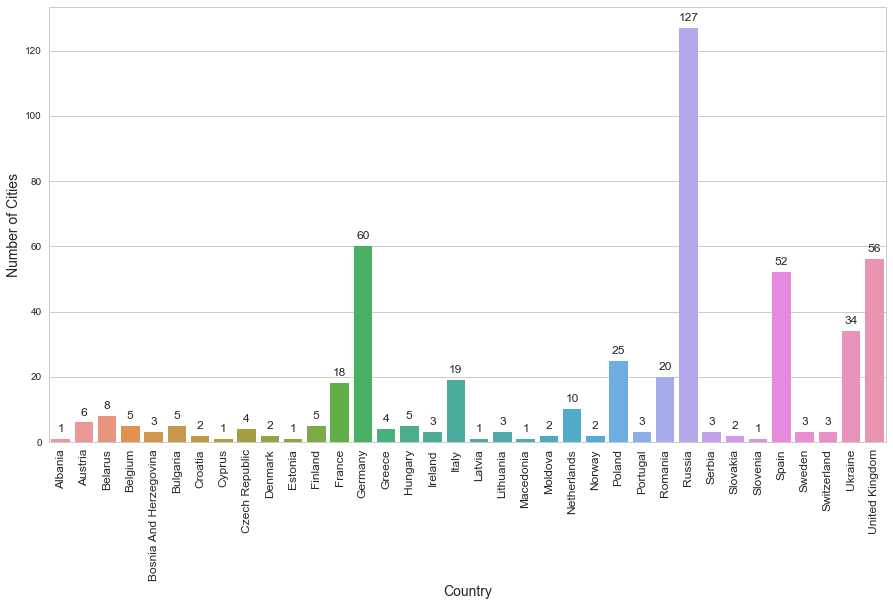

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="City", data=temp)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xlabel('Country', fontsize = 14)
ax.set_ylabel('Number of Cities', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


    
plt.show()

**3. Number of venues per country in the collected data of Europe** 

In [32]:
temp = df.groupby('Country')['Venue'].count().reset_index()

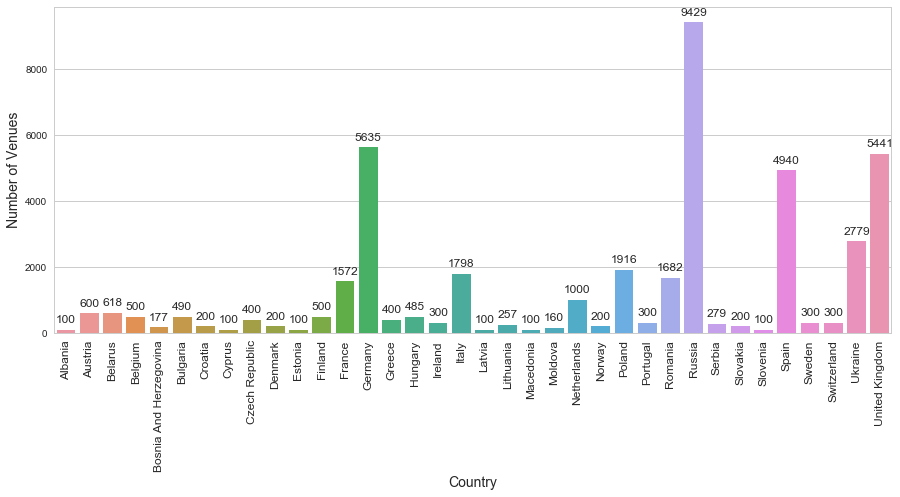

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Country", y="Venue", data=temp)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xlabel('Country', fontsize = 14)
ax.set_ylabel('Number of Venues', fontsize = 14)
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

#### 4. Common venues in Europe represented by the wordcloud

In [3]:
print('There are {} uniques categories.'.format(len(df['Venue Category'].unique())))

There are 561 uniques categories.


In [128]:
venue_category_list = []
for data in df['Venue Category']:
    venue_category_list.append(data)
text = '\n'.join(venue_category_list)

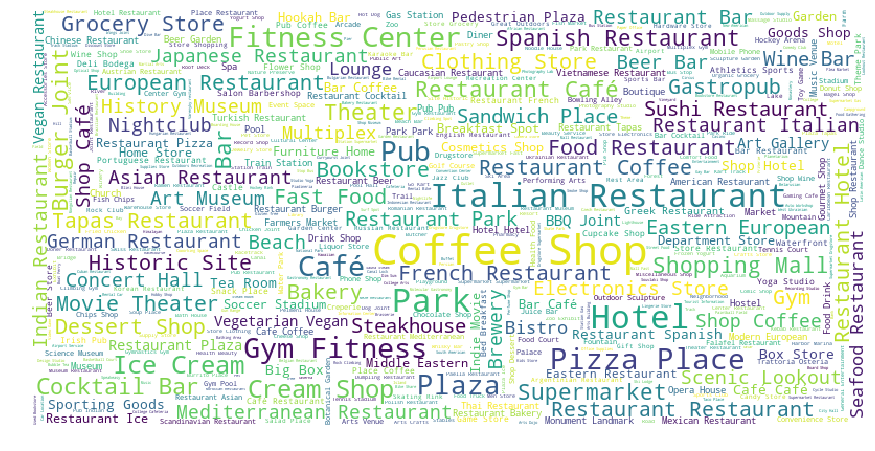

In [152]:
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5, width=800, height=400).generate(text)
plt.figure(figsize=(15,25))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()